## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('muay_thai/data/15.csv')
df[['clip_name', 'threshold', 'left_index_x', 'left_index_y', 'right_index_x', 'right_index_y']].head(9)

,clip_name,threshold,left_index_x,left_index_y,right_index_x,right_index_y
0,15_1,10,0.544166,0.458165,0.511471,0.419094
1,15_1,20,0.545551,0.467120,0.509140,0.419704
2,15_1,30,0.562433,0.372671,0.506123,0.435827
3,15_1,40,0.579780,0.324122,0.576346,0.320442
4,15_1,50,0.549371,0.520057,0.565075,0.521640
5,15_1,60,0.581117,0.415823,0.565254,0.418932
6,15_1,70,0.558997,0.447245,0.536606,0.438140
7,15_1,80,0.514204,0.488501,0.496259,0.460905
8,15_1,90,0.540936,0.489083,0.501790,0.454551


In [6]:
bodies = ['nose', 'left_eye_inner', 'left_eye', 'left_eye_outer', 'right_eye_inner', 'right_eye', 'right_eye_outer',
          'left_ear', 'right_ear', 'mouth_left', 'mouth_right', 'left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow',
          'left_wrist', 'right_wrist', 'left_pinky', 'right_pinky', 'left_index', 'right_index', 'left_thumb', 'right_thumb',
          'left_hip', 'right_hip', 'left_knee', 'right_knee', 'left_ankle', 'right_ankle', 'left_heel', 'right_heel',
          'left_foot_index', 'right_foot_index']

## Method 1

In [3]:
df2 = df.iloc[0:9][['left_index_x', 'left_index_y']].diff()

In [4]:
df2.dropna(how='all', inplace=True)

In [5]:
df2

,left_index_x,left_index_y
1,-0.104344,0.196709
2,0.123076,-0.313358
3,-0.062925,0.048458
4,-0.120099,-0.024737
5,-0.021679,0.049523
6,0.070099,-0.060485
7,0.011205,0.044316
8,0.127759,0.041194


In [6]:
df2['left_index_x_pow'] = df2['left_index_x'].pow(2)
df2['left_index_y_pow'] = df2['left_index_y'].pow(2)

In [7]:
df2['left_index'] = (df2['left_index_x_pow'] + df2['left_index_y_pow']) ** (1/2)

In [8]:
df2

,left_index_x,left_index_y,left_index_x_pow,left_index_y_pow,left_index
1,-0.104344,0.196709,0.010888,0.038694,0.222670
2,0.123076,-0.313358,0.015148,0.098193,0.336661
3,-0.062925,0.048458,0.003960,0.002348,0.079421
4,-0.120099,-0.024737,0.014424,0.000612,0.122620
5,-0.021679,0.049523,0.000470,0.002453,0.054060
6,0.070099,-0.060485,0.004914,0.003658,0.092587
7,0.011205,0.044316,0.000126,0.001964,0.045711
8,0.127759,0.041194,0.016322,0.001697,0.134236


In [9]:
df3 = df.groupby('clip_name')[['left_index_x', 'left_index_y']].diff().head(50)

Test

In [10]:
df = df.iloc[:,1:]
df

,clip_name,threshold,nose_x,nose_y,nose_z,left_eye_inner_x,left_eye_inner_y,left_eye_inner_z,left_eye_x,left_eye_y,...,left_heel_z,right_heel_x,right_heel_y,right_heel_z,left_foot_index_x,left_foot_index_y,left_foot_index_z,right_foot_index_x,right_foot_index_y,right_foot_index_z
0,14_1,10,0.567870,0.284519,-0.200837,0.570263,0.273062,-0.179035,0.571312,0.273613,...,-0.040277,0.484797,0.781020,0.292489,0.592605,0.839164,-0.146603,0.457704,0.811686,0.203486
1,14_1,20,0.617141,0.343931,-0.060774,0.616888,0.326928,-0.045834,0.616611,0.326109,...,0.132659,0.502107,0.925634,-0.294919,0.599094,0.841553,0.089582,0.552439,0.946941,-0.389824
2,14_1,30,0.611878,0.299378,-0.160271,0.615311,0.287662,-0.141140,0.616160,0.288395,...,0.090965,0.475588,0.861609,-0.216407,0.597873,0.844632,0.021472,0.496517,0.895449,-0.378048
3,14_1,40,0.549644,0.324865,-0.191559,0.555895,0.312351,-0.181069,0.559260,0.313134,...,0.077735,0.490697,0.786256,0.036113,0.594431,0.850574,-0.010828,0.455094,0.806379,-0.050669
4,14_1,50,0.506750,0.328185,-0.140869,0.509455,0.315938,-0.133467,0.511914,0.314126,...,0.050887,0.492733,0.791425,0.302609,0.596476,0.850945,-0.022955,0.449446,0.801641,0.266091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,14_27,80,0.503746,0.396018,-0.055994,0.500172,0.385949,-0.044862,0.499895,0.385582,...,0.212093,0.475598,0.873577,-0.083255,0.489846,0.832654,0.197524,0.506292,0.883610,-0.123624
247,14_27,90,0.501104,0.443778,-0.150162,0.496954,0.433065,-0.137966,0.496877,0.432575,...,0.252716,0.480585,0.860005,-0.047551,0.484115,0.820805,0.230766,0.500359,0.882694,-0.094810
248,14_27,100,0.503659,0.367640,-0.193738,0.499493,0.356455,-0.178493,0.499726,0.355904,...,0.312265,0.478238,0.868330,0.157168,0.515608,0.836517,0.276643,0.507405,0.891932,0.091273
249,14_27,110,0.519352,0.359350,-0.108759,0.515199,0.347549,-0.096676,0.515028,0.347342,...,0.230069,0.482130,0.860985,-0.040228,0.515546,0.834867,0.189018,0.512676,0.885817,-0.113983


In [11]:
df4 = df.set_index(['clip_name','threshold'])

In [12]:
df4 = df4.groupby('clip_name').diff()

In [13]:
df4.dropna(how='all', inplace=True)

In [14]:
delete_column = []
for body in bodies:
  delete_column.append('{}_z'.format(body))

In [15]:
df4.drop(columns=delete_column, inplace=True)

In [16]:
for body in bodies:
  df4[body] = (df4['{}_x'.format(body)].pow(2) + df4['{}_y'.format(body)].pow(2)) ** (1/2)

In [17]:
df5 = df4[bodies]

In [18]:
df5.reset_index(level='threshold', inplace=True)

In [19]:
value_dict = {}
count = 1
for i in range(20,200,10):
  value_dict[i] = count
  count+=1
value_dict

{20: 1,
 30: 2,
 40: 3,
 50: 4,
 60: 5,
 70: 6,
 80: 7,
 90: 8,
 100: 9,
 110: 10,
 120: 11,
 130: 12,
 140: 13,
 150: 14,
 160: 15,
 170: 16,
 180: 17,
 190: 18}

In [20]:
df5.replace({'threshold':value_dict}, inplace=True)

D:\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [21]:
# df5.reset_index(inplace=True)

In [22]:
# clip_ls = []
# for i in range(1,28):
#   clip_ls.append('15_{}'.format(i))

In [23]:
df5

,threshold,nose,left_eye_inner,left_eye,left_eye_outer,right_eye_inner,right_eye,right_eye_outer,left_ear,right_ear,...,left_hip,right_hip,left_knee,right_knee,left_ankle,right_ankle,left_heel,right_heel,left_foot_index,right_foot_index
clip_name,,,,,,,,,,,,,,,,,,,,,
14_1,1,0.077184,0.071242,0.069339,0.067305,0.074991,0.075792,0.076474,0.056294,0.070524,...,0.029048,0.029545,0.012427,0.075539,0.005750,0.133562,0.004905,0.145647,0.006915,0.165133
14_1,2,0.044862,0.039297,0.037716,0.036122,0.042538,0.043783,0.045197,0.029944,0.042022,...,0.032473,0.035941,0.015938,0.037597,0.001221,0.061643,0.001840,0.069300,0.003312,0.076018
14_1,3,0.067251,0.064341,0.062045,0.060013,0.069995,0.070914,0.071765,0.051820,0.065162,...,0.027468,0.036390,0.032556,0.051168,0.021928,0.074764,0.033619,0.076853,0.006867,0.098231
14_1,4,0.043022,0.046578,0.047356,0.048058,0.044475,0.043758,0.042584,0.049674,0.042301,...,0.019178,0.007932,0.012405,0.005314,0.030506,0.003068,0.049965,0.005555,0.002078,0.007372
14_1,5,0.058144,0.057176,0.057718,0.057905,0.055189,0.056151,0.059387,0.058597,0.061629,...,0.040142,0.032453,0.026682,0.007734,0.002335,0.000779,0.002160,0.002134,0.001404,0.002512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14_27,7,0.047826,0.046678,0.046247,0.045818,0.047124,0.046983,0.046841,0.043032,0.043809,...,0.038271,0.031089,0.010355,0.007545,0.021298,0.003943,0.030884,0.006265,0.005249,0.006069
14_27,8,0.047833,0.047226,0.047090,0.046927,0.048493,0.049345,0.050159,0.045320,0.050420,...,0.025534,0.032573,0.020931,0.019562,0.004526,0.007411,0.006797,0.014459,0.013162,0.006003
14_27,9,0.076181,0.076652,0.076723,0.076667,0.076041,0.075652,0.074916,0.074201,0.072296,...,0.035036,0.043194,0.026997,0.034684,0.025261,0.004412,0.041211,0.008650,0.035195,0.011619


In [24]:
total_mean_df = df5.groupby('threshold')[bodies].mean()

In [25]:
total_mean_df.reset_index(inplace=True)
total_mean_df.drop(10, inplace=True)

In [26]:
total_mean_df

,threshold,nose,left_eye_inner,left_eye,left_eye_outer,right_eye_inner,right_eye,right_eye_outer,left_ear,right_ear,...,left_hip,right_hip,left_knee,right_knee,left_ankle,right_ankle,left_heel,right_heel,left_foot_index,right_foot_index
0,1,0.063667,0.063648,0.063550,0.063531,0.063979,0.064084,0.064200,0.062659,0.063571,...,0.057877,0.056589,0.043161,0.056293,0.056613,0.082644,0.062853,0.091726,0.059440,0.090775
1,2,0.071852,0.072215,0.072235,0.072247,0.071603,0.071389,0.071221,0.069892,0.069052,...,0.059068,0.065373,0.033368,0.057542,0.030984,0.063608,0.034450,0.067779,0.033702,0.069760
2,3,0.067360,0.066663,0.066056,0.065503,0.067965,0.068228,0.068564,0.063960,0.066657,...,0.058405,0.062233,0.046203,0.058992,0.057497,0.074907,0.063665,0.079784,0.063413,0.086568
3,4,0.050719,0.050494,0.050286,0.050134,0.050657,0.050438,0.050290,0.048869,0.048931,...,0.033449,0.027280,0.029633,0.020339,0.030175,0.014181,0.040000,0.017025,0.020654,0.016575
4,5,0.047902,0.048157,0.047734,0.047270,0.049347,0.049799,0.050350,0.046284,0.050199,...,0.037738,0.039637,0.034158,0.027434,0.020133,0.024784,0.023141,0.026669,0.019376,0.028319
5,6,0.080028,0.079424,0.078700,0.077953,0.080932,0.081334,0.081754,0.075415,0.080826,...,0.049676,0.052838,0.046018,0.032032,0.017841,0.008019,0.024113,0.008054,0.013112,0.011752
6,7,0.040235,0.040851,0.040754,0.040630,0.040971,0.041022,0.041073,0.039414,0.040139,...,0.021346,0.021086,0.020485,0.016321,0.014903,0.007917,0.019017,0.008918,0.009706,0.011348
7,8,0.035055,0.035247,0.035017,0.034822,0.035338,0.035315,0.035327,0.033820,0.034431,...,0.017676,0.018913,0.019405,0.013446,0.007705,0.006034,0.009391,0.006313,0.008346,0.009288
8,9,0.046462,0.046818,0.046438,0.046050,0.047836,0.048316,0.048657,0.045543,0.048350,...,0.018800,0.023103,0.017848,0.022875,0.021862,0.004127,0.029046,0.005482,0.016810,0.005267
9,10,0.018234,0.018310,0.018204,0.018122,0.018946,0.019448,0.020155,0.019213,0.022074,...,0.012420,0.013176,0.009776,0.014139,0.002837,0.012689,0.003168,0.013092,0.003849,0.016730


In [27]:
heads = ['nose', 'left_eye_inner', 'left_eye', 'left_eye_outer', 'right_eye_inner', 'right_eye', 'right_eye_outer',
          'left_ear', 'right_ear', 'mouth_left', 'mouth_right']
no_heads = ['left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow',
          'left_wrist', 'right_wrist', 'left_pinky', 'right_pinky', 'left_index', 'right_index', 'left_thumb', 'right_thumb',
          'left_hip', 'right_hip', 'left_knee', 'right_knee', 'left_ankle', 'right_ankle', 'left_heel', 'right_heel',
          'left_foot_index', 'right_foot_index']

In [28]:
total_mean_df.drop(columns=heads, inplace=True)

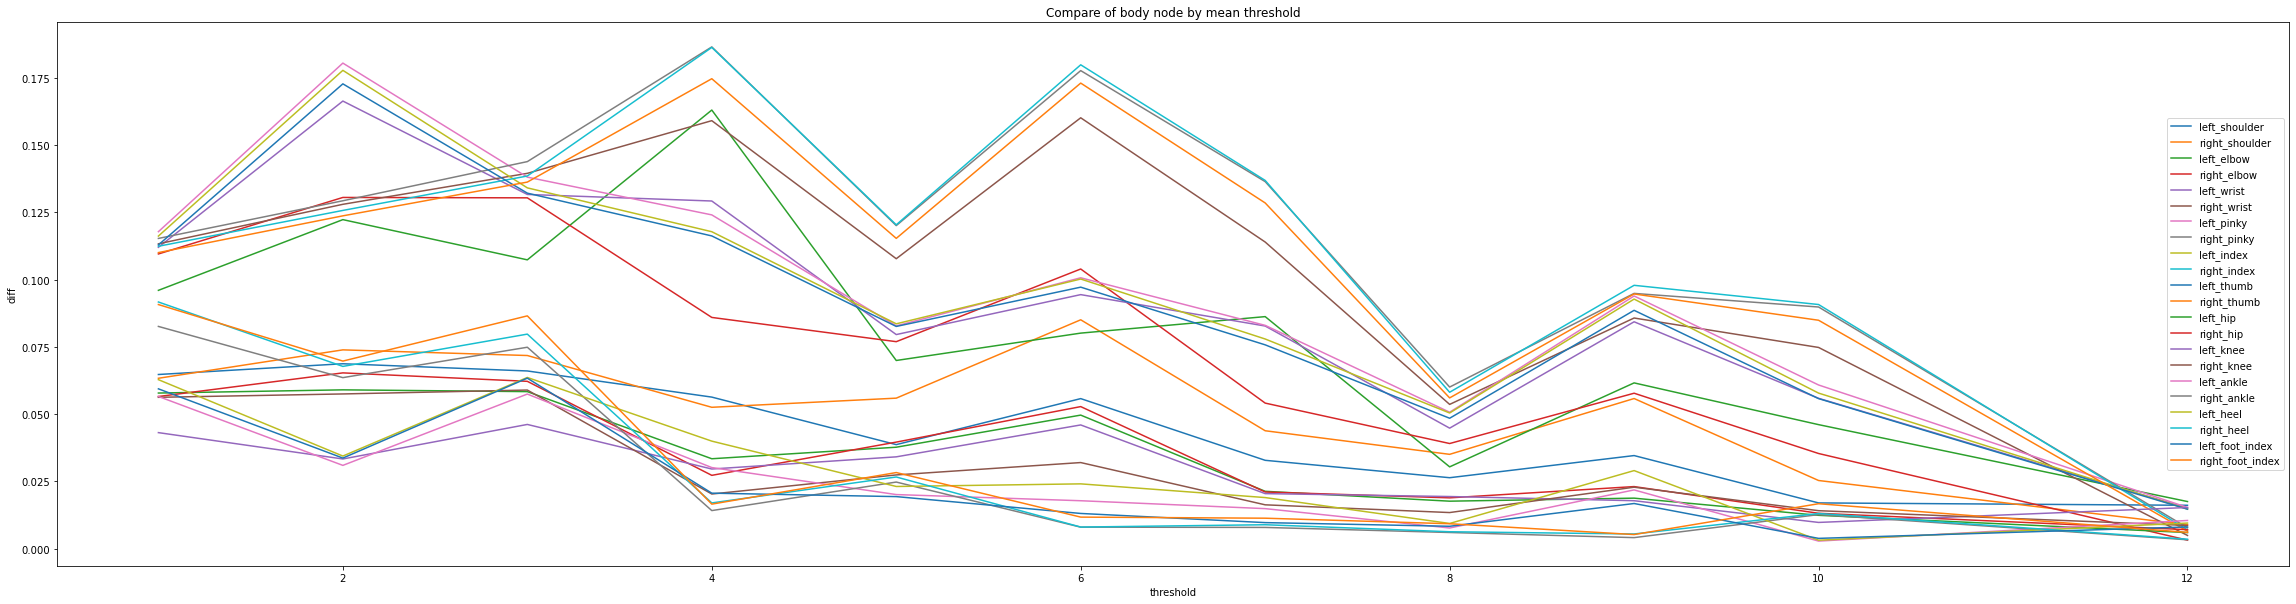

In [30]:
plt.figure(figsize=(40, 10))

for body in no_heads:
    plt.plot(total_mean_df.index+1, total_mean_df[body], label=body)

plt.title('Compare of body node by mean threshold')
plt.xlabel('threshold')
plt.ylabel('diff')
plt.legend(loc='right')
plt.show()

## Method 2

In [8]:
first_df = df[df['clip_name'] == '15_1']

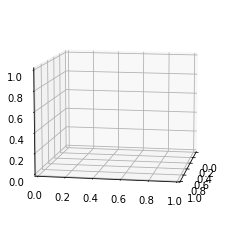

In [11]:
part1 = first_df[first_df['threshold'] == 10]

ax = plt.axes(projection='3d')
'''
for body in bodies:
    ax.scatter3D(
        xs=[-landmark.z],
        ys=[landmark.x],
        zs=[-landmark.y],
        color=_normalize_color(landmark_drawing_spec.color[::-1]),
    linewidth=landmark_drawing_spec.thickness)
'''
ax.view_init(elev=10, azim=10)